# **Banking Stock Data Analysis**

The Stock Market Analysis and Prediction project focuses on performing Exploratory Data Analysis (EDA), Data Visualization, and Predictive Analysis using real-time financial data from bank stocks. Python libraries are utilized to fetch stock information, visualize various aspects, and apply statistical methods to analyze and predict stock behavior.

**Methodology:**
- **Exploratory Data Analysis (EDA)**: Analyzing historical data to understand trends and patterns in bank stock prices.
- **Data Visualization**: Creating visual representations to illustrate stock price movements, trends, and correlations.
- **Predictive Analysis**: Using statistical techniques such as the Monte Carlo Method to forecast future stock prices based on historical performance.

The project aims to provide a comprehensive analysis of bank stocks' past performance and potential future trends.




# Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import warnings
# Suppress specific warnings
warnings.filterwarnings('ignore', message="Pandas requires version '1.3.6' or newer of 'bottleneck'")

In [2]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf

In [3]:
import pandas_datareader as web
# For time stamps
from datetime import datetime
# For division
from __future__ import division

"Let's use Yahoo Finance and pandas to grab some data for some banking company stocks."

In [4]:
warnings.filterwarnings('ignore')
# Example: Define the list of stocks to fetch data for
banking_list = ['HDFCBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']
start_date = '2023-01-01'
end_date = '2024-01-01'

# Function to fetch historical data for a list of stocks
def fetch_stock_data(stocks, start, end):
    dfs = {}
    for stock in stocks:
        try:
            ticker = yf.Ticker(stock)
            data = ticker.history(start=start, end=end)
            dfs[stock] = data
            print(f'Retrieved data for {stock}')
        except Exception as e:
            print(f'Failed to retrieve data for {stock}: {str(e)}')
    return dfs

# Fetch historical data for banking stocks
dfs = fetch_stock_data(banking_list, start_date, end_date)



Retrieved data for HDFCBANK.NS
Retrieved data for ICICIBANK.NS
Retrieved data for SBIN.NS
Retrieved data for AXISBANK.NS
Retrieved data for KOTAKBANK.NS


In [5]:
print(dfs['HDFCBANK.NS'].head())


                                  Open         High          Low        Close  \
Date                                                                            
2023-01-02 00:00:00+05:30  1586.883712  1599.319340  1578.642108  1588.541748   
2023-01-03 00:00:00+05:30  1582.201915  1602.489104  1582.201915  1598.929077   
2023-01-04 00:00:00+05:30  1594.686455  1605.171396  1567.376840  1570.351685   
2023-01-05 00:00:00+05:30  1575.179515  1578.154360  1550.210749  1560.256714   
2023-01-06 00:00:00+05:30  1562.500110  1569.425025  1539.286890  1555.087524   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-01-02 00:00:00+05:30  2190689        0.0           0.0  
2023-01-03 00:00:00+05:30  4189015        0.0           0.0  
2023-01-04 00:00:00+05:30  5175800        0.0           0.0  
2023-01-05 00:00:00+05:30  5470718        0.0           0.0  
2023-01-06 00:00:00+05:30  4546231        0.0           0.0 

In [6]:
# Example: Print descriptive statistics for HDFCBANK.NS data
if 'HDFCBANK.NS' in dfs:
    hdfc_data = dfs['HDFCBANK.NS']
    print(hdfc_data.describe())
else:
    print('Data for HDFCBANK.NS not found.')


              Open         High          Low        Close        Volume  \
count   245.000000   245.000000   245.000000   245.000000  2.450000e+02   
mean   1582.529235  1593.309612  1570.533928  1581.492216  1.605166e+07   
std      56.669108    57.294552    55.964734    56.867106  9.627905e+06   
min    1442.551378  1457.546564  1440.578324  1443.685913  2.190689e+06   
25%    1546.797108  1558.598620  1531.190941  1541.237549  1.004989e+07   
50%    1590.727829  1601.123715  1578.692299  1588.902832  1.488846e+07   
75%    1626.785494  1634.480466  1613.072730  1623.215210  1.939759e+07   
max    1700.232569  1733.823914  1690.712664  1704.918579  8.670560e+07   

        Dividends  Stock Splits  
count  245.000000         245.0  
mean     0.077551           0.0  
std      1.213865           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max     19.000000           0.0  


#### Function of describe() in Pandas
The describe() function in pandas provides a summary of key descriptive statistics for a DataFrame's numerical columns. For HDFC Bank's stock data, this function computes and displays the following metrics:

- **Count**: The number of non-null entries.
    
- **Mean**: The average value.
    
- **Standard Deviation (std)**: The measure of data spread around the mean.
    
- **Minimum (min)**: The smallest value.
    
- **25th Percentile (25%)**: The value below which 25% of the data fall.
    
- **Median (50%)**: The middle value, also known as the 50th percentile.
    
- **75th Percentile (75%)**: The value below which 75% of the data fall.
    
- **Maximum (max)**: The largest value.
    
By running hdfc_data.describe(), you obtain a comprehensive statistical summary that highlights the central tendency, dispersion, and range of HDFC Bank's stock prices and trading volumes. This function is useful for gaining insights into the distribution and variability of the stock's historical performance.

In [7]:
# Example: Print descriptive statistics for HDFCBANK.NS data
if 'HDFCBANK.NS' in dfs:
    hdfc_data = dfs['HDFCBANK.NS']
    icic_data = dfs['ICICIBANK.NS']
    sbi_data = dfs['SBIN.NS']
    axis_data =dfs['AXISBANK.NS']
    kotak_data= dfs['KOTAKBANK.NS']
    print(hdfc_data.info())
else:
    print('Data for HDFCBANK.NS not found.')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-01-02 00:00:00+05:30 to 2023-12-29 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          245 non-null    float64
 1   High          245 non-null    float64
 2   Low           245 non-null    float64
 3   Close         245 non-null    float64
 4   Volume        245 non-null    int64  
 5   Dividends     245 non-null    float64
 6   Stock Splits  245 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.3 KB
None


The info() function in pandas provides a concise summary of a DataFrame's structure and content. Specifically, it gives us:
- **The total number of rows (entries) in the DataFrame**.
- **The number of non-null values for each column**.
- **The data type (dtype) of each column**.
- **An estimate of the memory usage of the DataFrame**.

This summary is useful for quickly understanding the size of the dataset, checking for missing values, verifying column data types, and assessing memory usage. It's a crucial first step in data exploration and preparation before performing more detailed analysis or operations on the data.

Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

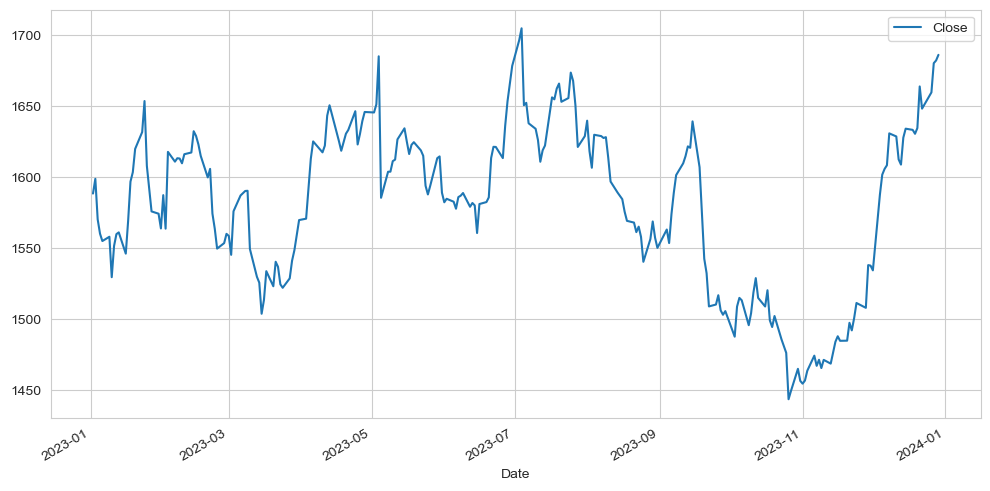

In [8]:
# Let's see a historical view of the closing price
hdfc_data['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

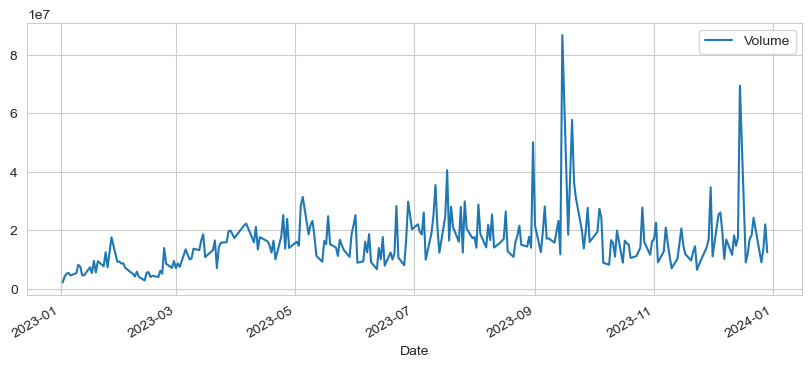

In [9]:
# Now let's plot the total volume of stock being traded each day. 
hdfc_data['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

##### 'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [10]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    hdfc_data[column_name]=pd.DataFrame.rolling(hdfc_data['Close'],ma).mean()

<p>Now let's go ahead and plot all the additional Moving Averages</p>

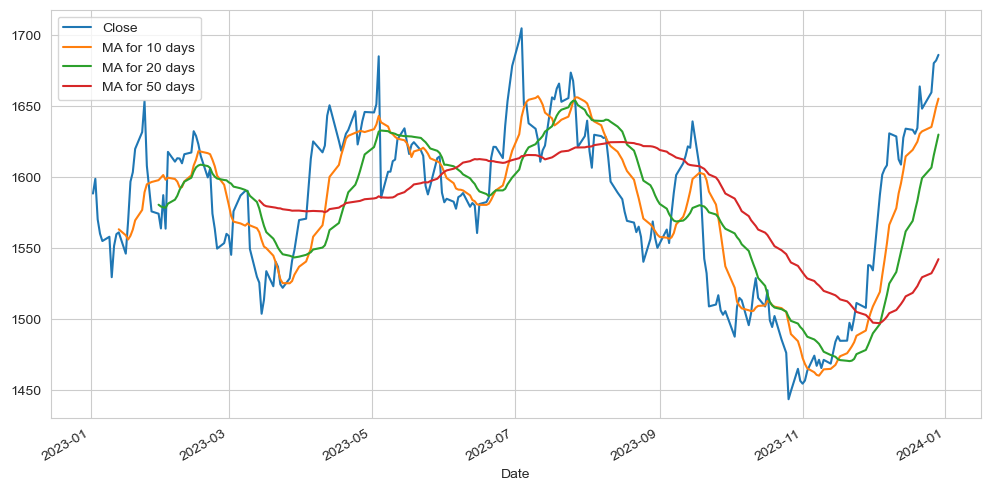

In [11]:
hdfc_data[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

#####  Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the HDFC Bank stock.

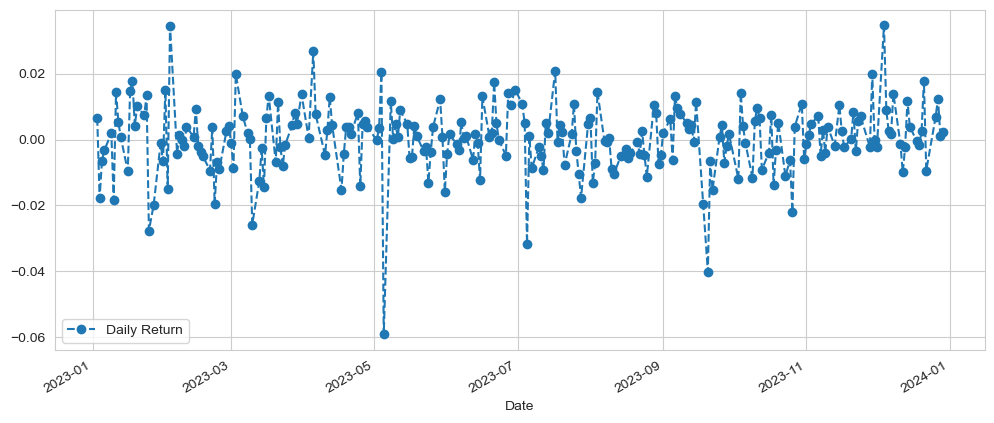

In [12]:
# use pct_change to find the percent change for each day
hdfc_data['Daily Return'] = hdfc_data['Close'].pct_change()
# plot the daily return percentage
hdfc_data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

##### Analysis of HDFC Bank's Daily Returns

The objective of this analysis is to calculate and visualize the daily return percentage of HDFC Bank's stock. The daily return is computed as the percentage change in the closing price from the previous day using hdfc_data['Close'].pct_change(). This calculation helps assess the stock's volatility, with large spikes indicating high volatility and small changes indicating stability. The daily returns are then plotted to visualize these variations over time, using dashed lines and circular markers for clarity. This plot helps identify trends, patterns, and outliers in the stock's performance, providing insights into investment risk and historical performance. Understanding these daily return patterns assists in making informed decisions about buying, selling, or holding the stock based on observed trends and volatility.



Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.


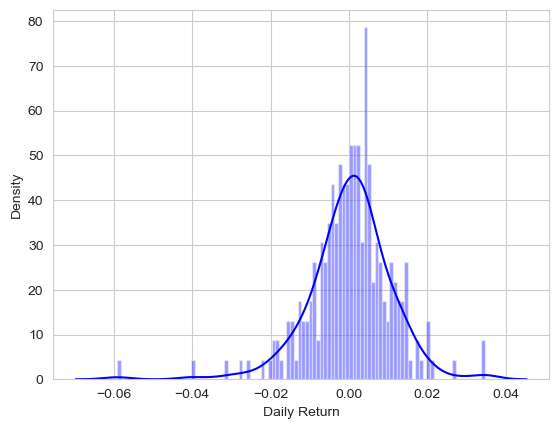

In [13]:
warnings.filterwarnings('ignore')
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(hdfc_data['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

 #### The graph shows the distribution of daily returns for HDFC bank 

- **Shape**: The distribution is roughly bell-shaped, suggesting that the daily returns are normally distributed. This means most returns cluster around the average, with fewer returns occurring further away from the average.
- **Average**: The peak of the distribution (around 0) indicates the average daily return.
- **Volatility**: The width of the distribution indicates the asset's volatility. A wider distribution suggests greater volatility, meaning larger swings in returns both up and down are more likely.
- **Skewness**: The distribution appears slightly skewed to the left. This means there are a few days with extremely high negative returns, while the positive returns are generally smaller.
    
    In other words, the graph suggests that the asset's daily returns are mostly small, with a few larger movements in both positive and negative directions. The majority of the returns are clustered around 0, indicating that the asset's price doesn't change much on most days.


Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.


In [14]:
closing_df1 = pd.DataFrame(hdfc_data['Close'])
close1  = closing_df1.rename(columns={"Close": "hdfc_data_close"})

closing_df2 = pd.DataFrame(icic_data['Close'])
close2  = closing_df2.rename(columns={"Close": "icic_data_close"})

closing_df3 = pd.DataFrame(sbi_data['Close'])
close3  = closing_df3.rename(columns={"Close": "sbi_data_close"})

closing_df4 = pd.DataFrame(axis_data['Close'])
close4  = closing_df4.rename(columns={"Close": "axis_data_close"})

closing_df5 = pd.DataFrame(kotak_data['Close'])
close5  = closing_df5.rename(columns={"Close": "kotak_data_close"})

closing_df = pd.concat([close1, close2, close3, close4, close5], axis=1)
closing_df.head()

hdfc_data_close  icic_data_close  sbi_data_close  \
Date                                                                          
2023-01-02 00:00:00+05:30      1588.541748       895.082336      590.625610   
2023-01-03 00:00:00+05:30      1598.929077       893.991272      590.818542   
2023-01-04 00:00:00+05:30      1570.351685       891.759644      583.872314   
2023-01-05 00:00:00+05:30      1560.256714       871.972534      583.775757   
2023-01-06 00:00:00+05:30      1555.087524       862.996399      579.482666   

                           axis_data_close  kotak_data_close  
Date                                                          
2023-01-02 00:00:00+05:30       940.640076       1823.548584  
2023-01-03 00:00:00+05:30       961.319031       1831.342041  
2023-01-04 00:00:00+05:30       956.473999       1819.252075  
2023-01-05 00:00:00+05:30       948.581970       1818.802490  
2023-01-06 00:00:00+05:30       938.941895       1785.329956

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [15]:
# Make a new tech returns DataFrame
bank_returns = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

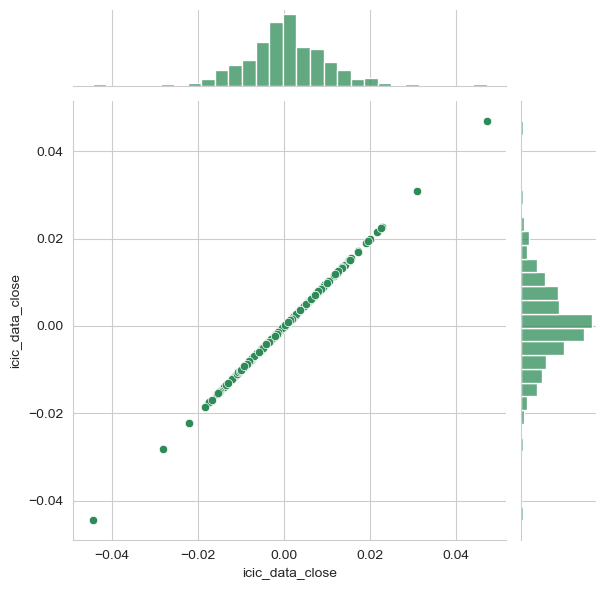

In [16]:
warnings.filterwarnings('ignore')
# Drop NaN values (if any)
bank_returns = bank_returns.dropna()

# Plotting using sns.jointplot
sns.jointplot(x='icic_data_close', y='icic_data_close', data=bank_returns, kind='scatter', color='seagreen')
plt.show()

When you plot a stock against itself, the scatter plot shows how its returns vary over time. If the points cluster tightly around a diagonal line, it means the stock has shown consistent returns. However, if the points are scattered widely, it indicates that the stock's returns have been more volatile or inconsistent across different time periods. Essentially, the closer the points are to the diagonal line, the more stable the returns; the further away they are, the more fluctuation there has been in the stock's performance over time.

-  So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare ICICI Bank and SBI Bank the same way.

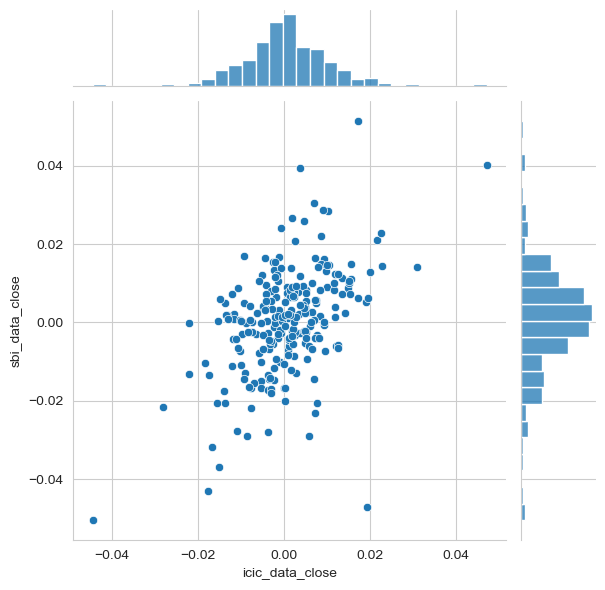

In [17]:
warnings.filterwarnings('ignore')
# Drop NaN values (if any)
bank_returns = bank_returns.dropna()

# Plotting using sns.jointplot
sns.jointplot(x='icic_data_close', y='sbi_data_close', data=bank_returns, kind='scatter')
plt.show()

-  This graph shows how the daily returns of two stocks, ICICI Bank and SBI, relate to each other. Each point on the graph represents a day where we compare how much ICICI Bank's returns (shown on the horizontal axis) compare to SBI's returns (shown on the vertical axis). If the points on the graph are close together and form a straight line going from the bottom-left to the top-right, it means that when ICICI Bank had a good or bad day in terms of returns, SBI tended to have a similar kind of day. This suggests that their returns are closely linked. However, if the points are scattered around without forming a clear pattern, it means that ICICI Bank and SBI don't necessarily move in the same direction on the same days. This helps us see if these stocks tend to move together or independently over time.

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give us a sense of how correlated the daily percentage returns are.

For a quick intuitive sense, check out the picture below.

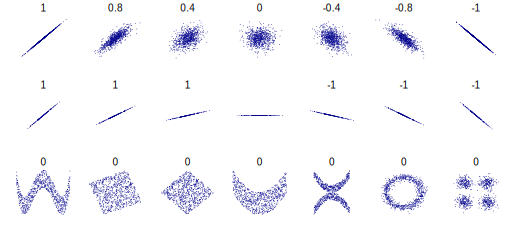

In [18]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


Python's Seaborn and pandas packages make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.

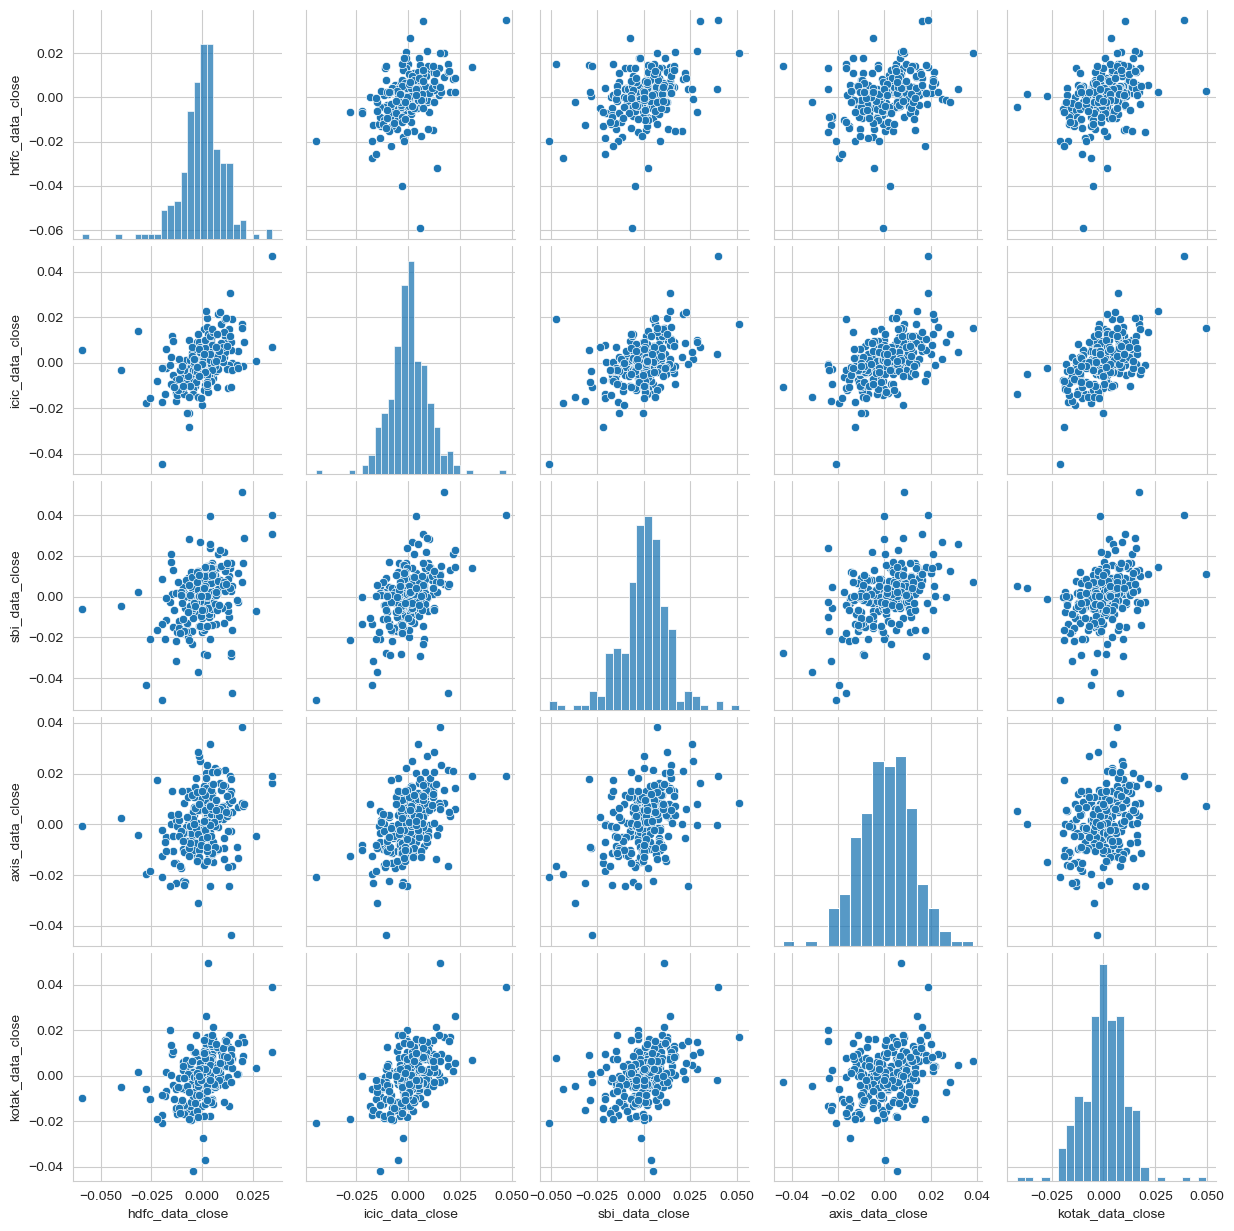

In [19]:
warnings.filterwarnings('ignore')
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(bank_returns.dropna())
plt.show()

-  The sns.pairplot(bank_returns.dropna()) code generates a series of visual plots that help us understand how different stocks' daily returns or prices relate to each other. Each plot in the grid compares two variables—for instance, comparing HDFC Bank's performance with ICICI Bank, SBI, Axis Bank, and Kotak Mahindra Bank. The scatter plots show dots that indicate how these variables move together: if the dots form a diagonal line going upwards, it means when one stock does well, the other does too; if the line goes down, one goes up while the other goes down. Histograms on the diagonal show how each stock's returns are distributed on their own. This visual setup allows us to quickly see patterns and relationships between stocks, which is useful for understanding how they might perform together or independently in the stock market.

Above we can see all the relationships on daily returns between all the stocks.

We can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

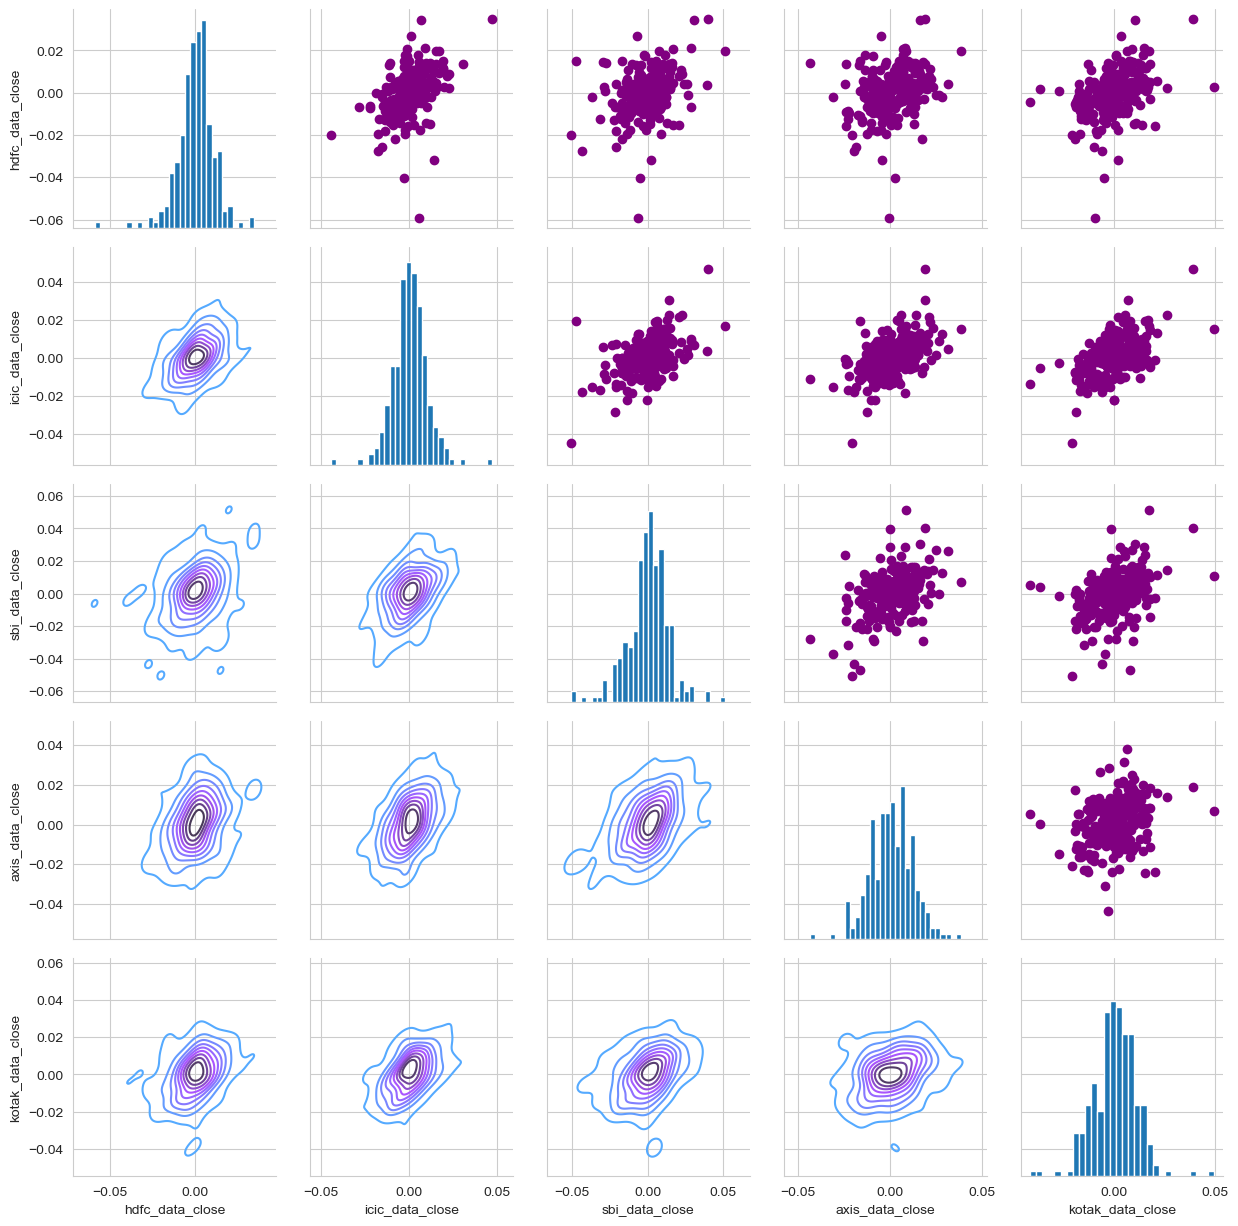

In [20]:
#It may arise warnings, to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(bank_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


plt.show()

**Analysis of Bank Stocks Daily Returns**

This graph provides a comprehensive view of the daily returns of different bank stocks:

1. **Histograms on the Diagonal**: 
   These show the distribution of daily returns for each stock individually, helping us understand how often certain returns occur.

2. **Scatter Plots in the Upper Triangle**: 
   These plots compare daily returns between pairs of stocks. A tight cluster of points along the diagonal indicates a strong correlation, meaning the stocks tend to move together.

3. **KDE Plots in the Lower Triangle**: 
   These plots show the density of returns between pairs of stocks using contour lines and color gradients. They help us see where returns are most concentrated.

Overall, this graph helps us understand both individual stock behaviors and relationships between different stocks, aiding in identifying patterns and making investment decisions.


We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

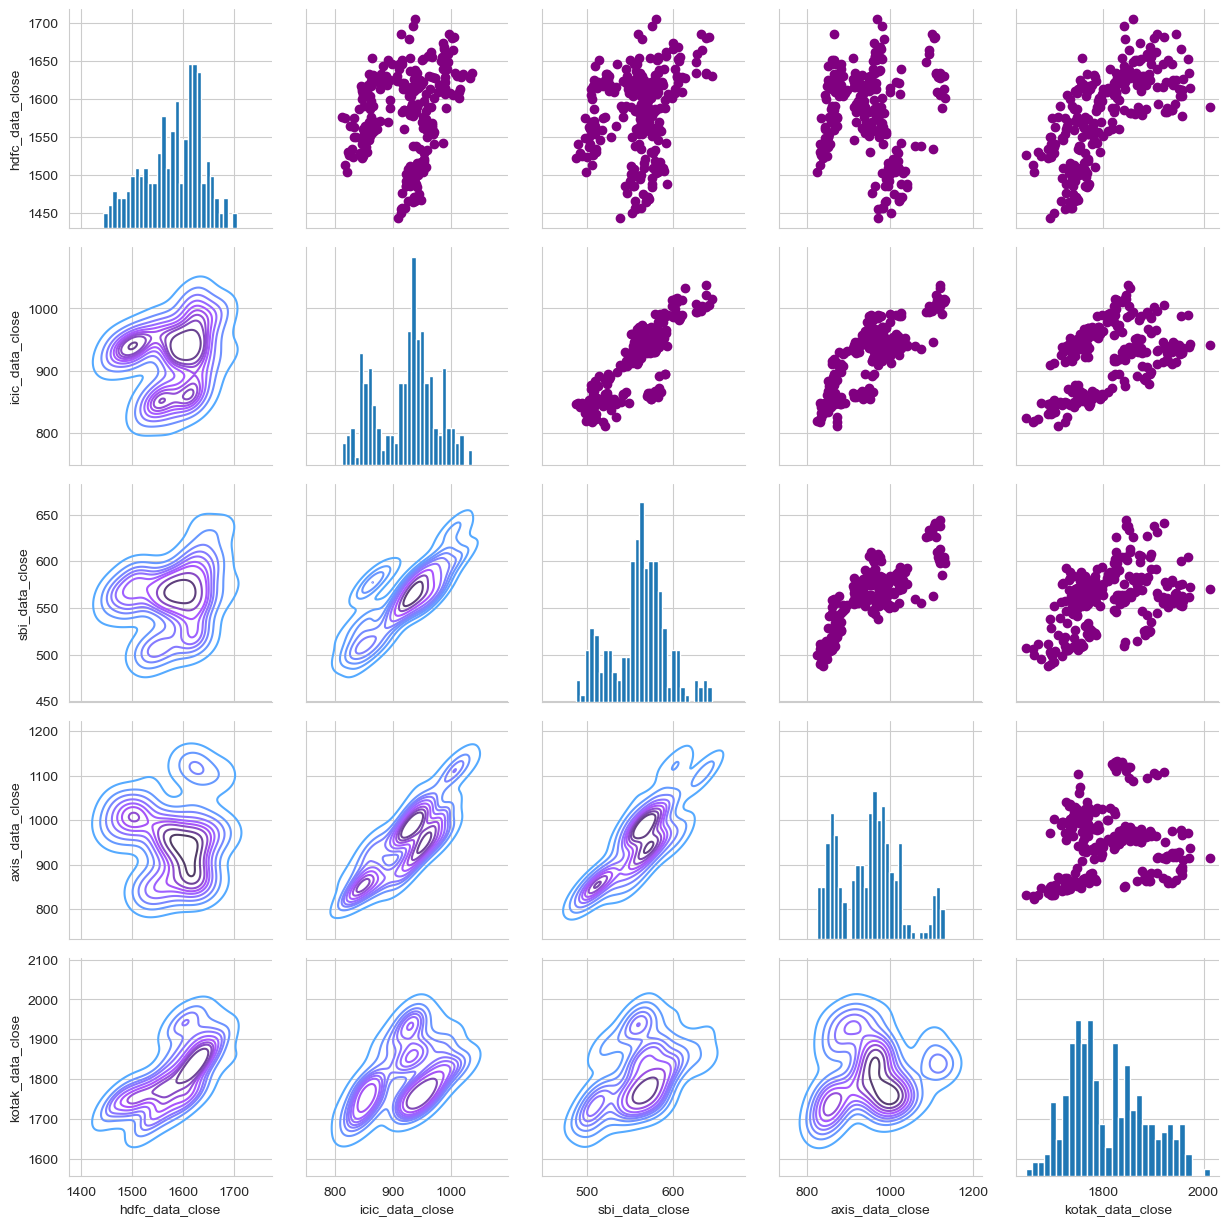

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

-  This graph helps visualize the relationships and distributions of closing prices for different bank stocks. By comparing this to the previous graph using daily returns, we can gain insights into both the overall price levels of the stocks and their daily performance changes. The visual differences arise because one focuses on price changes (returns) and the other on the prices themselves. This analysis helps in understanding how stock prices and their movements relate to each other, aiding in investment decision-making.

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

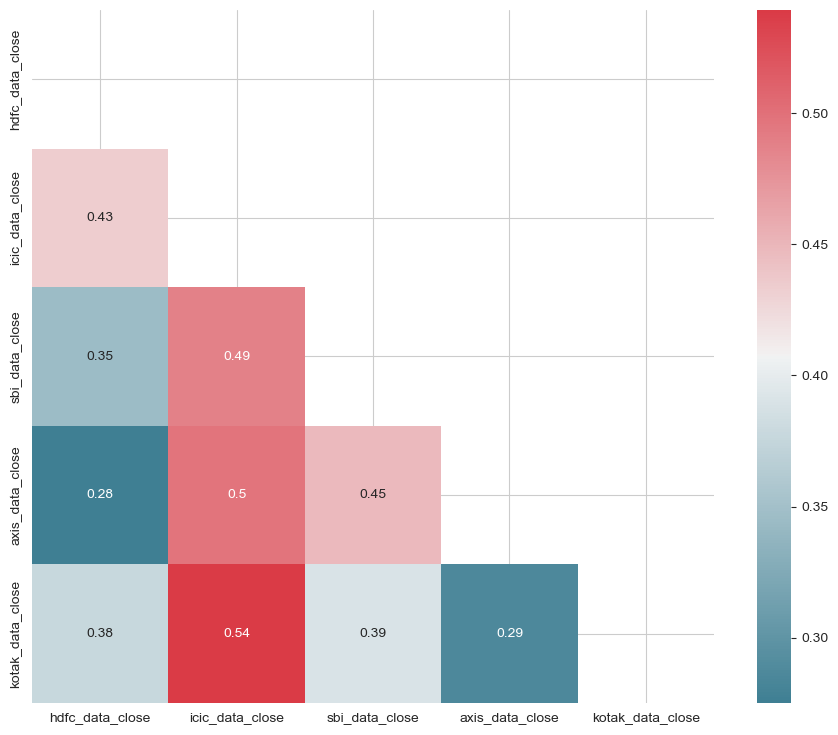

In [22]:
# use sebron for a quick correlation plot for the daily returns
# Compute the correlation matrix
corr = bank_returns.dropna().corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

**Explanation of the Heatmap Code**

The provided code generates a heatmap to visualize the correlation between the daily returns of different bank stocks. Here's what each part of the code does:

1. **Import Libraries and Ignore Warnings**:
   - `warnings.filterwarnings('ignore')` suppresses any warnings that might arise during execution.
   - Necessary libraries (NumPy, Seaborn, and Matplotlib) are imported.

2. **Correlation Matrix Calculation**:
   - `corr = bank_returns.dropna().corr()` calculates the correlation matrix for the DataFrame `bank_returns`, which contains the daily returns of different bank stocks.

3. **Mask for the Upper Triangle**:
   - `mask = np.zeros_like(corr)` creates a mask to hide the upper triangle of the heatmap.
   - `mask[np.triu_indices_from(mask)] = True` sets the upper triangle values to True.

4. **Set up the Matplotlib Figure**:
   - `fig, ax = plt.subplots(figsize=(11, 9))` sets up the figure size for the plot.

5. **Custom Diverging Colormap**:
   - `cmap = sns.diverging_palette(220, 10, as_cmap=True)` generates a custom colormap.

6. **Draw the Heatmap**:
   - `sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)` draws the heatmap using the correlation matrix and mask.
   - `plt.show()` displays the plot.

**Interpretation of the Heatmap**

The heatmap displays the correlation coefficients between the daily returns of different bank stocks:

- **Color Scale**: Positive correlations are shown in shades of red, while negative correlations are in shades of blue.
- **Correlation Coefficient Values**: The values range from -1 to 1.
  - **1**: Perfect positive correlation (stocks move exactly together).
  - **0**: No correlation (stocks' movements are unrelated).
  - **-1**: Perfect negative correlation (stocks move in opposite directions).
- **Diagonal Values**: These are all 1, as each stock is perfectly correlated with itself.
- **Off-Diagonal Values**: Indicate the strength of correlation between different pairs of stocks. For instance, a value of 0.54 between `icic_data_close` and `kotak_data_close` suggests a moderately strong positive correlation.

**Summary** 

This heatmap shows how the daily returns of various bank stocks are related to each other. The colors and numbers indicate whether stocks tend to move together or independently. For example, if two stocks have a high correlation value (close to 1), it means they usually move in the same direction. This helps investors understand the relationships between different bank stocks, which can inform their investment decisions.


We've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

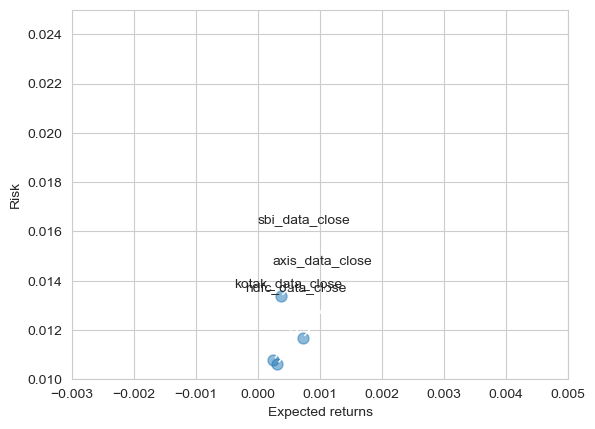

In [23]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal bank_returns DataFrame
rets = bank_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

##### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

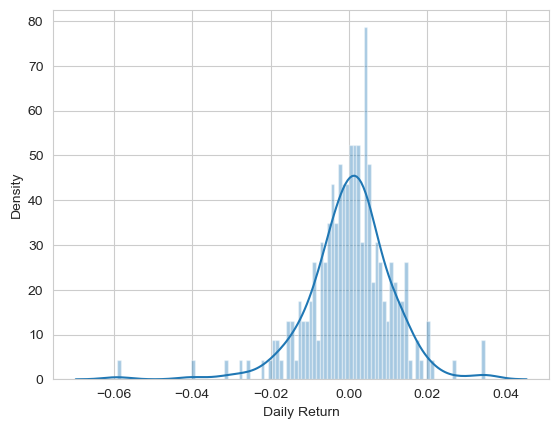

In [24]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(hdfc_data['Daily Return'].dropna(), bins=100)
plt.show()

Now we can use quantile to get the risk value for the stock.

In [25]:
'''A pure python RETS client for real estate data. Make requests to the MLS server to get real estate listings, media, 
and metadata'''

rets.head()

hdfc_data_close  icic_data_close  sbi_data_close  \
Date                                                                          
2023-01-03 00:00:00+05:30         0.006539        -0.001219        0.000327   
2023-01-04 00:00:00+05:30        -0.017873        -0.002496       -0.011757   
2023-01-05 00:00:00+05:30        -0.006428        -0.022189       -0.000165   
2023-01-06 00:00:00+05:30        -0.003313        -0.010294       -0.007354   
2023-01-09 00:00:00+05:30         0.001944         0.003735        0.011737   

                           axis_data_close  kotak_data_close  
Date                                                          
2023-01-03 00:00:00+05:30         0.021984          0.004274  
2023-01-04 00:00:00+05:30        -0.005040         -0.006602  
2023-01-05 00:00:00+05:30        -0.008251         -0.000247  
2023-01-06 00:00:00+05:30        -0.010163         -0.018404  
2023-01-09 00:00:00+05:30         0.020055          0.014047

In [26]:
# The 0.05 empirical quantile of daily returns
emp = rets['sbi_data_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.020663541498846173


The 0.05 empirical quantile of daily returns is at -0.024. That means that with 95% confidence, our worst daily loss will not exceed 2.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.024 * 1,000,000 = $24,000.

In [27]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Now let's grab our mu (drift) from the expected return data we got for hdfc_bank_close
mu = rets.mean()['hdfc_data_close']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['hdfc_data_close']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we have already calculated from our daily returns

In [28]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Now let's put our function to work!

In [29]:
#First, get the HDFC_bank DataFrame
hdfc_data.head()

Open         High          Low        Close  \
Date                                                                            
2023-01-02 00:00:00+05:30  1586.883712  1599.319340  1578.642108  1588.541748   
2023-01-03 00:00:00+05:30  1582.201915  1602.489104  1582.201915  1598.929077   
2023-01-04 00:00:00+05:30  1594.686455  1605.171396  1567.376840  1570.351685   
2023-01-05 00:00:00+05:30  1575.179515  1578.154360  1550.210749  1560.256714   
2023-01-06 00:00:00+05:30  1562.500110  1569.425025  1539.286890  1555.087524   

                            Volume  Dividends  Stock Splits  MA for 10 days  \
Date                                                                          
2023-01-02 00:00:00+05:30  2190689        0.0           0.0             NaN   
2023-01-03 00:00:00+05:30  4189015        0.0           0.0             NaN   
2023-01-04 00:00:00+05:30  5175800        0.0           0.0             NaN   
2023-01-05 00:00:00+05:30  5470718        0.0           0.0             NaN   
2023-01-06 00:00:00+05:30  4546231        0.0           0.0             NaN   

                           MA for 20 days  MA for 50 days  Daily Return  
Date                                                                     
2023-01-02 00:00:00+05:30             NaN             NaN           NaN  
2023-01-03 00:00:00+05:30             NaN             NaN      0.006539  
2023-01-04 00:00:00+05:30             NaN             NaN     -0.017873  
2023-01-05 00:00:00+05:30             NaN             NaN     -0.006428  
2023-01-06 00:00:00+05:30             NaN             NaN     -0.003313

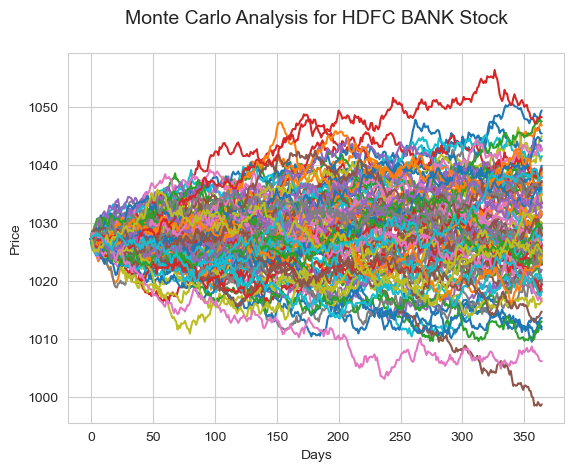

In [30]:
# Get start price(stock open price) from HDFC.head()
start_price = 1027.27

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for HDFC BANK Stock\n', fontsize = 14)
plt.show()

- **Monte Carlo Analysis for HDFC Bank Stock**

The graph illustrates multiple potential future price paths for HDFC Bank stock using Monte Carlo simulation:

**Simulation Details**:
- The simulation runs 100 times to predict future stock prices.
- Starting price (`start_price = 1027.27`) is the initial value for projections.

** Graph Interpretation**:
- X-axis: Days into the future.
- Y-axis: Simulated stock price.

**Insights**:
- Variability: Each line represents a different possible price trajectory.
- Risk Assessment: Wider spread indicates higher volatility and uncertainty.
- Expected Trend: Overall trend helps assess potential future price movements.

**Use Case**:
- Helps investors understand risk and potential outcomes for investment decisions.
- This analysis assists in quantifying risk and projecting future scenarios based on historical data and assumed statistical parameters.


Get a histogram of the end results for a much larger run.

In [31]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use [qunatile](http://en.wikipedia.org/wiki/Quantile) to define our risk for this stock.

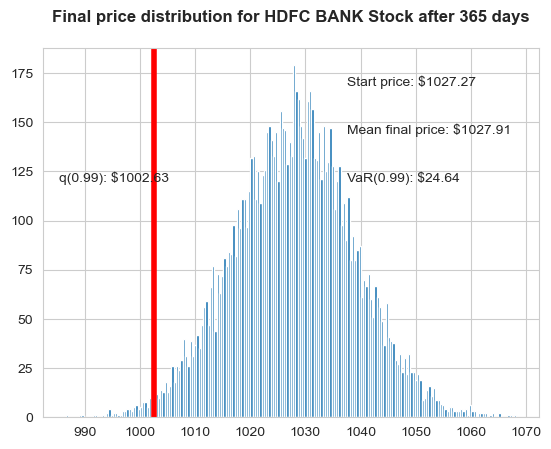

In [32]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for HDFC BANK Stock after %s days\n" % days, weight='bold');

- The graph depicts the distribution of simulated future prices for HDFC Bank stock using Monte Carlo simulations.
- It features a histogram where each bar represents the frequency of different price scenarios.
- This VaR represents the maximum expected loss at the 99% confidence level for every $1027.27 invested.
- The visualization aids investors in understanding the downside risk associated with their investment in HDFC Bank stock.
- It provides clarity on potential outcomes and supports informed decision-making in managing investment risks.
- Emphasizes the importance of considering probabilistic scenarios when evaluating investment strategies, aligning decisions with risk tolerance and financial objectives.
